# Arbre-tree 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,polygon
import contextily as ctx
import missingno as msno
import seaborn as sns

df = pd.read_csv('p2-arbres-fr.csv', delimiter=';')

In [203]:
# J'importe le fichier geojson
df = gpd.read_file('les-arbres.geojson')

In [204]:
df.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
0,204538,Arbre,Alignement,PARIS 12E ARRDT,23,None,AVENUE DU BEL AIR,000103027,Erable,Acer,platanoides,''Columnare'',20,5,Jeune (arbre),NON,POINT (2.39702 48.84681)
1,233243,Arbre,Alignement,PARIS 19E ARRDT,None,None,RUE DE BELLEVILLE,002901003,Sophora,Styphnolobium,japonicum,None,120,15,Adulte,NON,POINT (2.40119 48.87590)
2,108249,Arbre,Jardin,PARIS 16E ARRDT,Canton 03,None,JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE,000303010,If,Taxus,baccata,''Lutea'',52,3,Adulte,NON,POINT (2.28903 48.86010)
3,133954,Arbre,Jardin,PARIS 17E ARRDT,None,None,SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL,000103001,Tilleul,Tilia,x europaea,''Pallida'',65,7,Jeune (arbre)Adulte,NON,POINT (2.31786 48.89408)
4,139945,Arbre,Jardin,PARIS 19E ARRDT,None,None,JARDIN ILOT RIQUET,00000101,Charme,Carpinus,betulus,None,85,9,Adulte,NON,POINT (2.37540 48.89040)


In [205]:
df.info()    

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 208904 entries, 0 to 208903
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   idbase              208904 non-null  int64   
 1   typeemplacement     208904 non-null  object  
 2   domanialite         208904 non-null  object  
 3   arrondissement      208904 non-null  object  
 4   complementadresse   60337 non-null   object  
 5   numero              0 non-null       object  
 6   adresse             208904 non-null  object  
 7   idemplacement       208904 non-null  object  
 8   libellefrancais     195921 non-null  object  
 9   genre               208902 non-null  object  
 10  espece              206285 non-null  object  
 11  varieteoucultivar   40070 non-null   object  
 12  circonferenceencm   208904 non-null  int64   
 13  hauteurenm          208904 non-null  int64   
 14  stadedeveloppement  161831 non-null  object  
 15  remarquab

In [206]:
df.shape

(208904, 17)

In [207]:
df.describe(include='all')

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
count,2.089040e+05,208904,208904,208904,60337,0,208904,208904,195921,208902,206285,40070,208904.000000,208904.000000,161831,187311,208904
unique,NaN,1,9,25,5177,0,7442,63970,202,185,571,524,NaN,NaN,4,2,208810
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,2,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,000101001,Platane,Platanus,x hispanica,''Baumannii'',NaN,NaN,Adulte,NON,POINT (2.361824759598679 48.82732751870307)
freq,NaN,208904,107331,17650,840,NaN,2961,2316,42314,42570,37145,4814,NaN,NaN,78545,187124,2
mean,5.016561e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.894550,8.814958,NaN,NaN,NaN
std,6.711236e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.001688,5.934766,NaN,NaN,NaN
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1.609198e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,NaN,NaN
50%,2.305115e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,NaN,NaN
75%,2.859412e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,NaN,NaN


<Axes: >

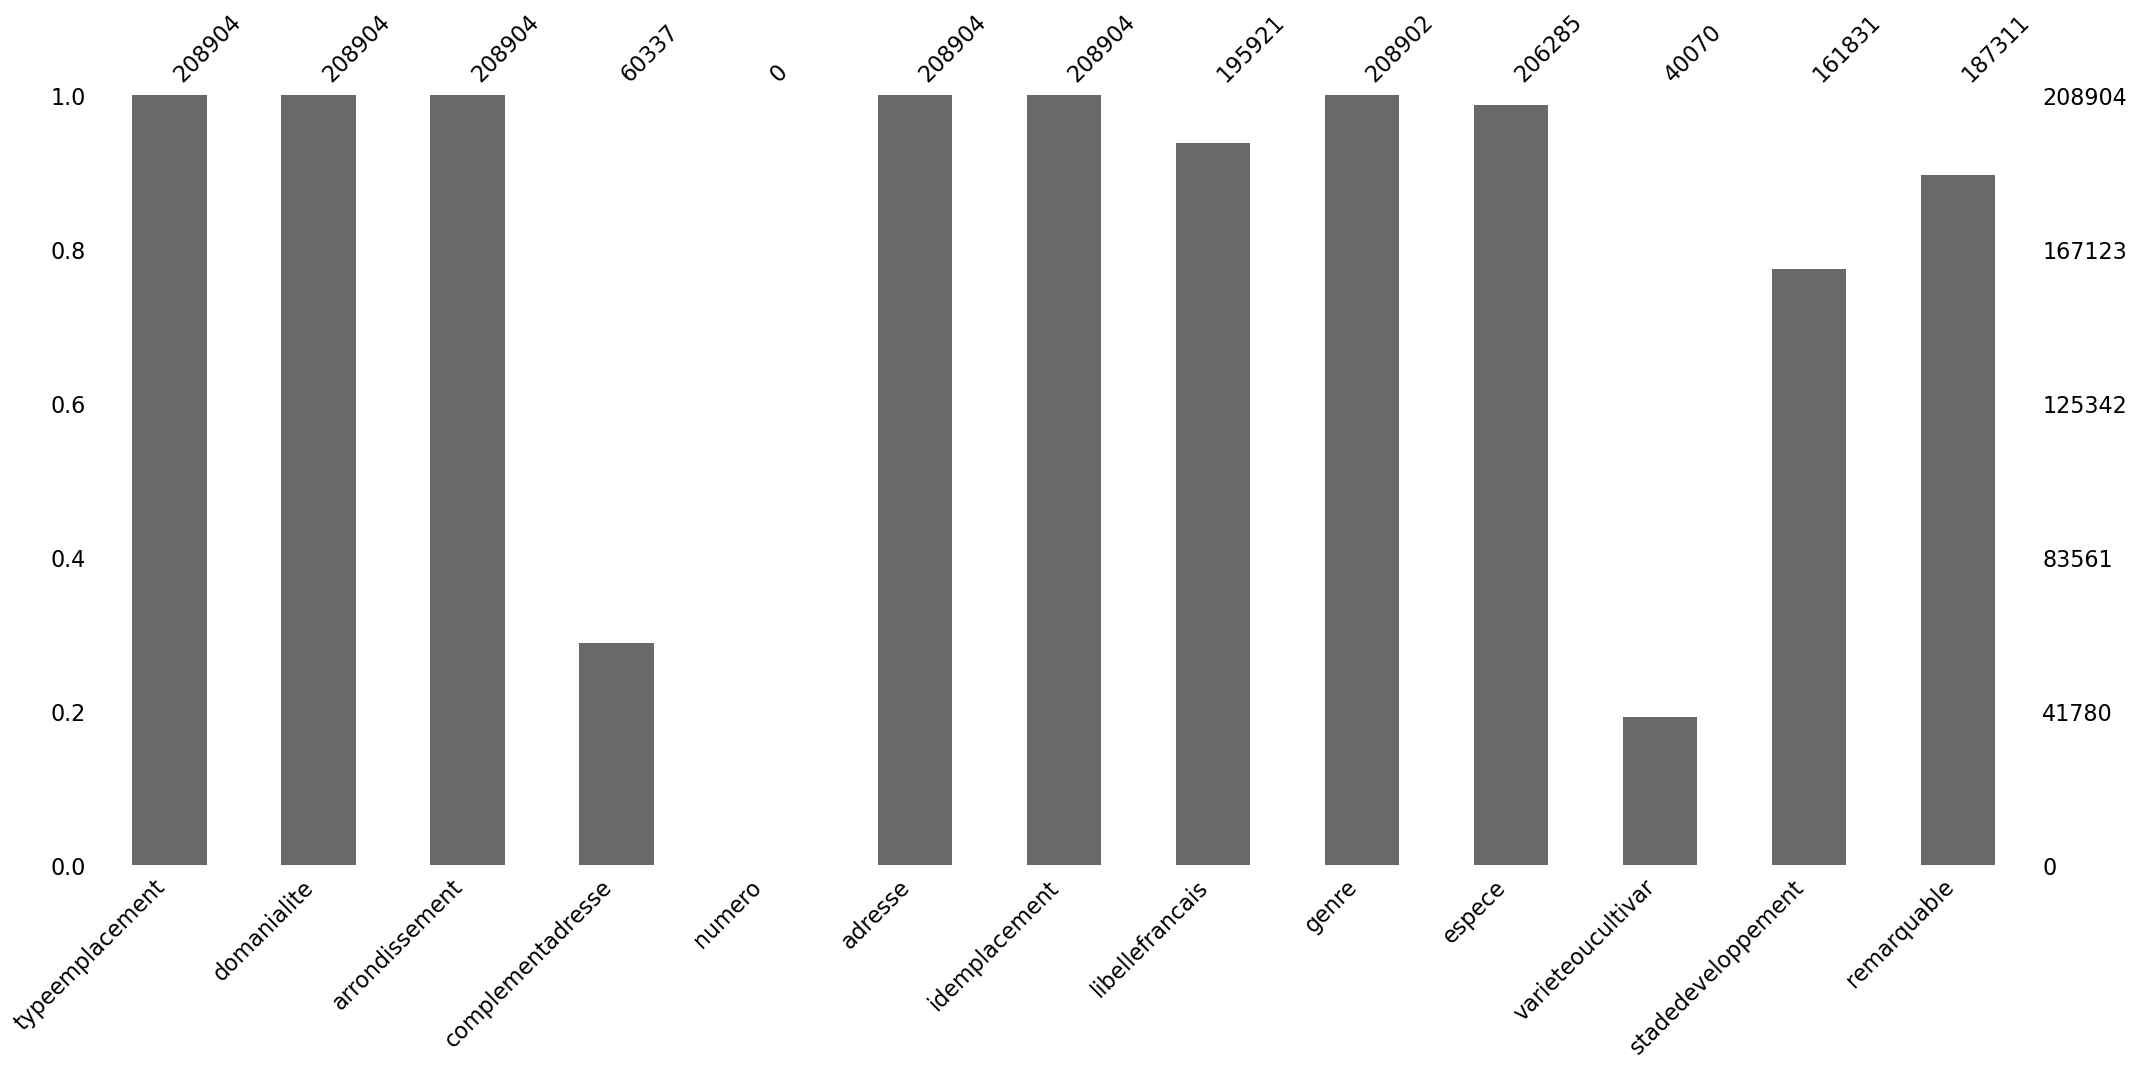

In [208]:
msno.bar(df.select_dtypes('object'))

In [209]:
# Création d'une boucle qui va afficher le nom de la colonne, le nombre de valeurs manquantes
# les valeurs uniques ainsi que leur nombre
for col in df.select_dtypes('object'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ typeemplacement
nbr_nan: 0
1 valeurs uniques
['Arbre']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ domanialite
nbr_nan: 0
9 valeurs uniques
['Alignement' 'Jardin' 'CIMETIERE' 'DASCO' 'PERIPHERIQUE' 'DJS' 'DFPE'
 'DAC' 'DASES']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ arrondissement
nbr_nan: 0
25 valeurs uniques
['PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 16E ARRDT' 'PARIS 17E ARRDT'
 'PARIS 20E ARRDT' 'BOIS DE VINCENNES' 'PARIS 14E ARRDT'
 'BOIS DE BOULOGNE' 'PARIS 15E ARRDT' 'SEINE-SAINT-DENIS']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ complementadresse
nbr_nan: 148567
5177 valeurs uniques
['23' None 'Canton 03' '203' '268' '6' 'TOURNELLES / VOSGES' '2' '266'
 'F119']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ numero
nbr_nan: 208904
0 valeurs uniques
[None]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ adresse
nbr_nan: 0
7442 valeurs uniques
['AVENUE DU BEL AIR' 'RUE DE BELLEVILLE'
 'JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE'
 'SQUARE ERNEST GOUIN / 19 RUE EMILE 

**Premières observations**  

**Variables qualitatives**:  

* La colonne **'type_emplacement'** ne contient qu'une valeur **'arbre'**
* La colonne domanialite correspond aux types d'espaces publics :
    * Jardin : espace vert, parc
    *  Alignement : espaces le long des rues
    *  DJS : Equipements sportifs
    *  DFPE : Crèches
    *  Cimetiere : cimetière
    *  
DASC : 	Ecole
    *  es : DAC	Equipements cultu
    *  els
 : ASES	Action so
* La colonne arrondissement comprend tous les arrondissements (1er au 20eme ainsi que le bois de Boulogne, le bois de Vincennes, les Hauts-de-Seine, le Val de Marne et la Seine-Saint-Denis.
* La colonne **complément d'adresse** contient beaucoup de valeurs manquantes.
* Les colonnes **lieu, id_emplacement** ne contiennent pas de valeurs manquantes et désignent un lieu.
* La colonne **libelle_francais** affiche le nom de l'arbre en français. Elle comprend 192 types et 1497 valeurs manquantes.
* Les colonnes **genre, espece et variété** donnent plus d'informations sur le type d'arbre. Elles correspondent à trois niveaux de classification des plantes.
* La colonne **stade_developpement** indique les différents stades de développement des arbres (4 valeurs)ndas)
* 

<Axes: >

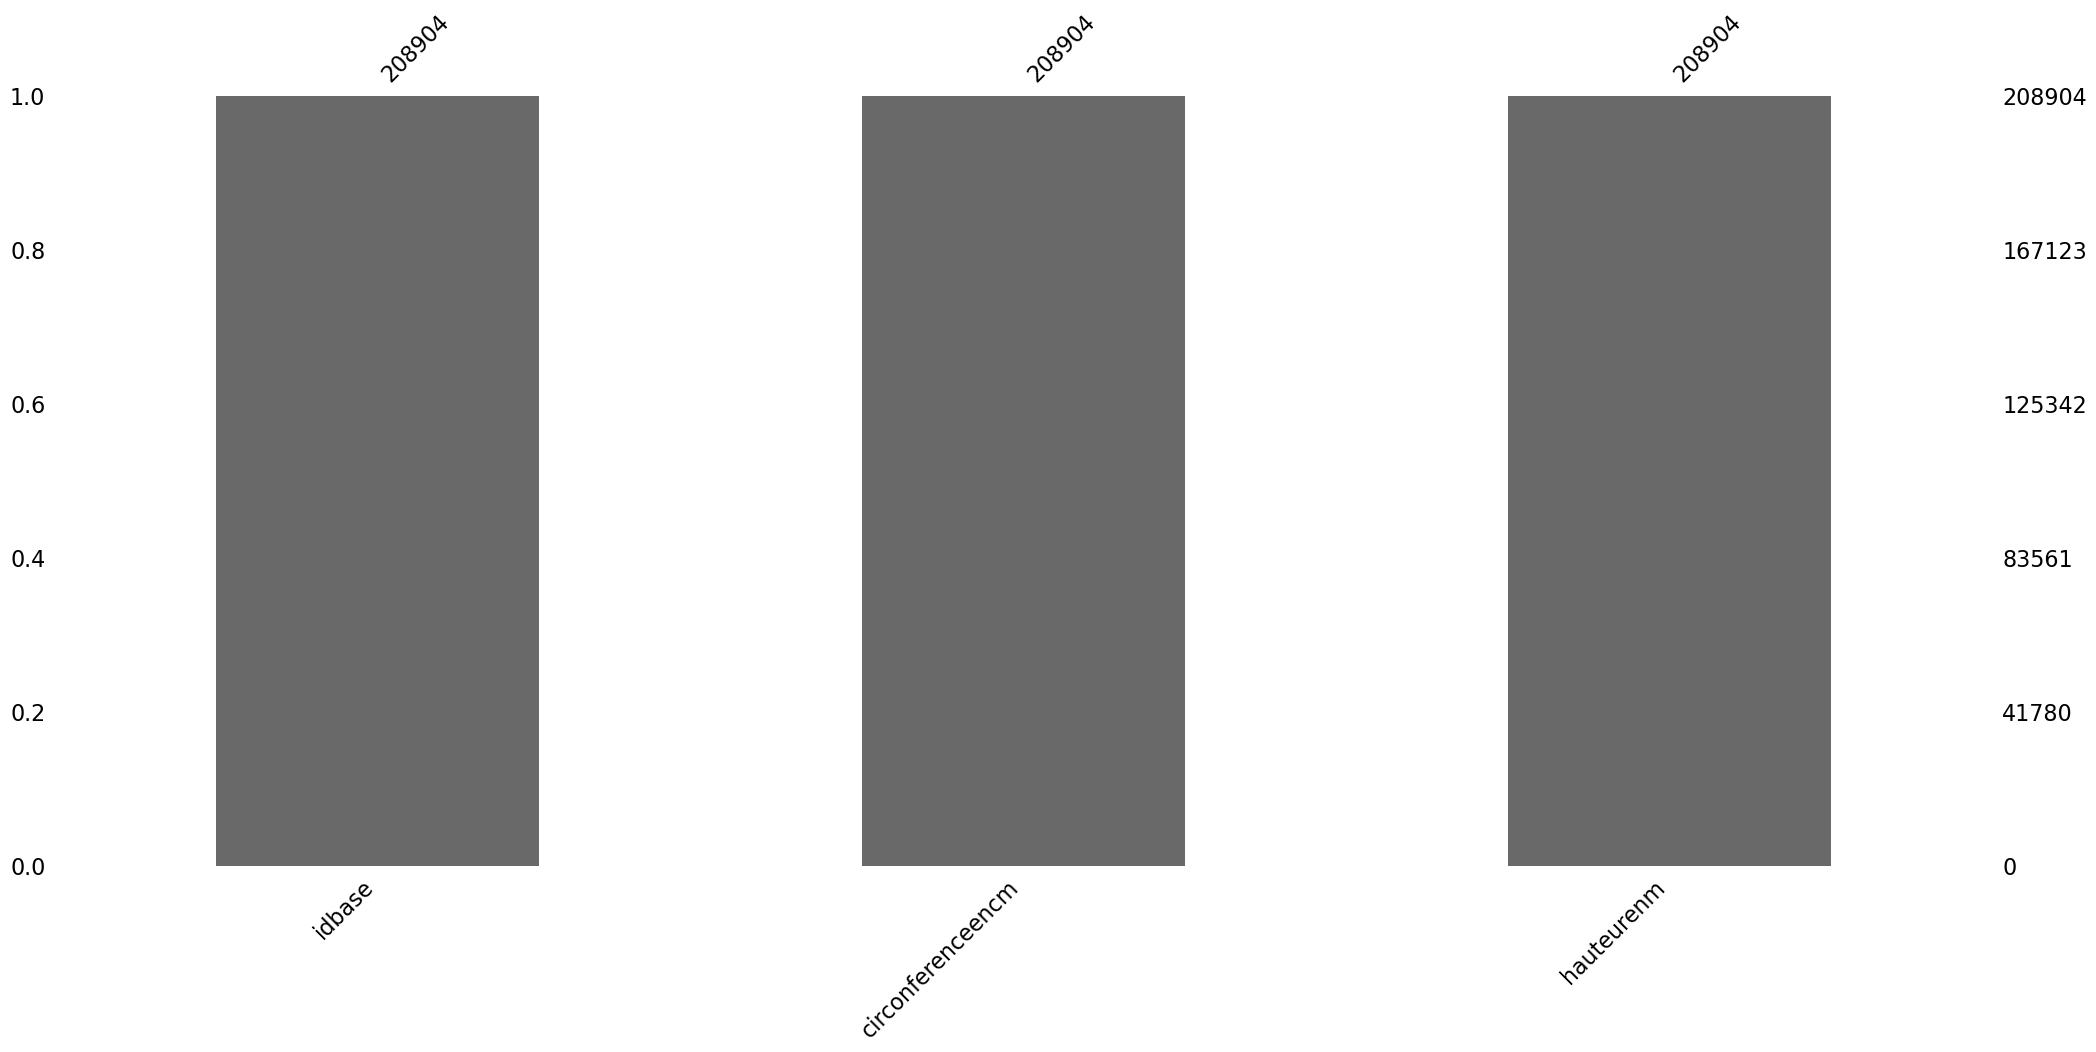

In [210]:
msno.bar(df.select_dtypes('number'))

In [211]:
for col in df.select_dtypes('number'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ idbase
nbr_nan: 0
208902 valeurs uniques
[204538 233243 108249 133954 139945 146765 189685 196887 202033 266747]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ circonferenceencm
nbr_nan: 0
458 valeurs uniques
[ 20 120  52  65  85 100 145  60 116  40]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ hauteurenm
nbr_nan: 0
48 valeurs uniques
[ 5 15  3  7  9  8  4 19 10 12]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _


**Variables quantitatives :**  

* La colonne id correspond à l'id de l'arbre
* La colonne **numero** est **vide**.
* Les colonnes **circonference_cm et hauteur** donne des informations sur la taille de l'arbre et ne contiennent pas de valeurs manquantes.
* La colonne **remarquable** indique quel arbre est dit *remarquable* (Un arbre remarquable est un arbre qui est considéré comme exceptionnel en raison de ses caractéristiques particulières, de son âge, de sa taille, de sa rareté, de son histoire ou de son importance écologique, culturelle ou historique). Elle comprend 63098 valeurs manquantes.
* Les deux dernières colonnes sont des données spatiales qui vont me permettrent d'afficher mes données via Geopandas.

# Traitement des valeurs manquantes

In [212]:
#Je retire les colonnes numero, typeemplacement, complementadresse

df = df.drop(['numero','typeemplacement', 'complementadresse'],axis=1)

In [213]:
df.head()

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
0,204538,Alignement,PARIS 12E ARRDT,AVENUE DU BEL AIR,000103027,Erable,Acer,platanoides,''Columnare'',20,5,Jeune (arbre),NON,POINT (2.39702 48.84681)
1,233243,Alignement,PARIS 19E ARRDT,RUE DE BELLEVILLE,002901003,Sophora,Styphnolobium,japonicum,None,120,15,Adulte,NON,POINT (2.40119 48.87590)
2,108249,Jardin,PARIS 16E ARRDT,JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE,000303010,If,Taxus,baccata,''Lutea'',52,3,Adulte,NON,POINT (2.28903 48.86010)
3,133954,Jardin,PARIS 17E ARRDT,SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL,000103001,Tilleul,Tilia,x europaea,''Pallida'',65,7,Jeune (arbre)Adulte,NON,POINT (2.31786 48.89408)
4,139945,Jardin,PARIS 19E ARRDT,JARDIN ILOT RIQUET,00000101,Charme,Carpinus,betulus,None,85,9,Adulte,NON,POINT (2.37540 48.89040)


In [214]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'varieteoucultivar',
       'circonferenceencm', 'hauteurenm', 'stadedeveloppement', 'remarquable',
       'geometry'],
      dtype='object')

## Colonnes libellefrancais', 'genre', 'espece', 'varieteoucultivar'

<Axes: >

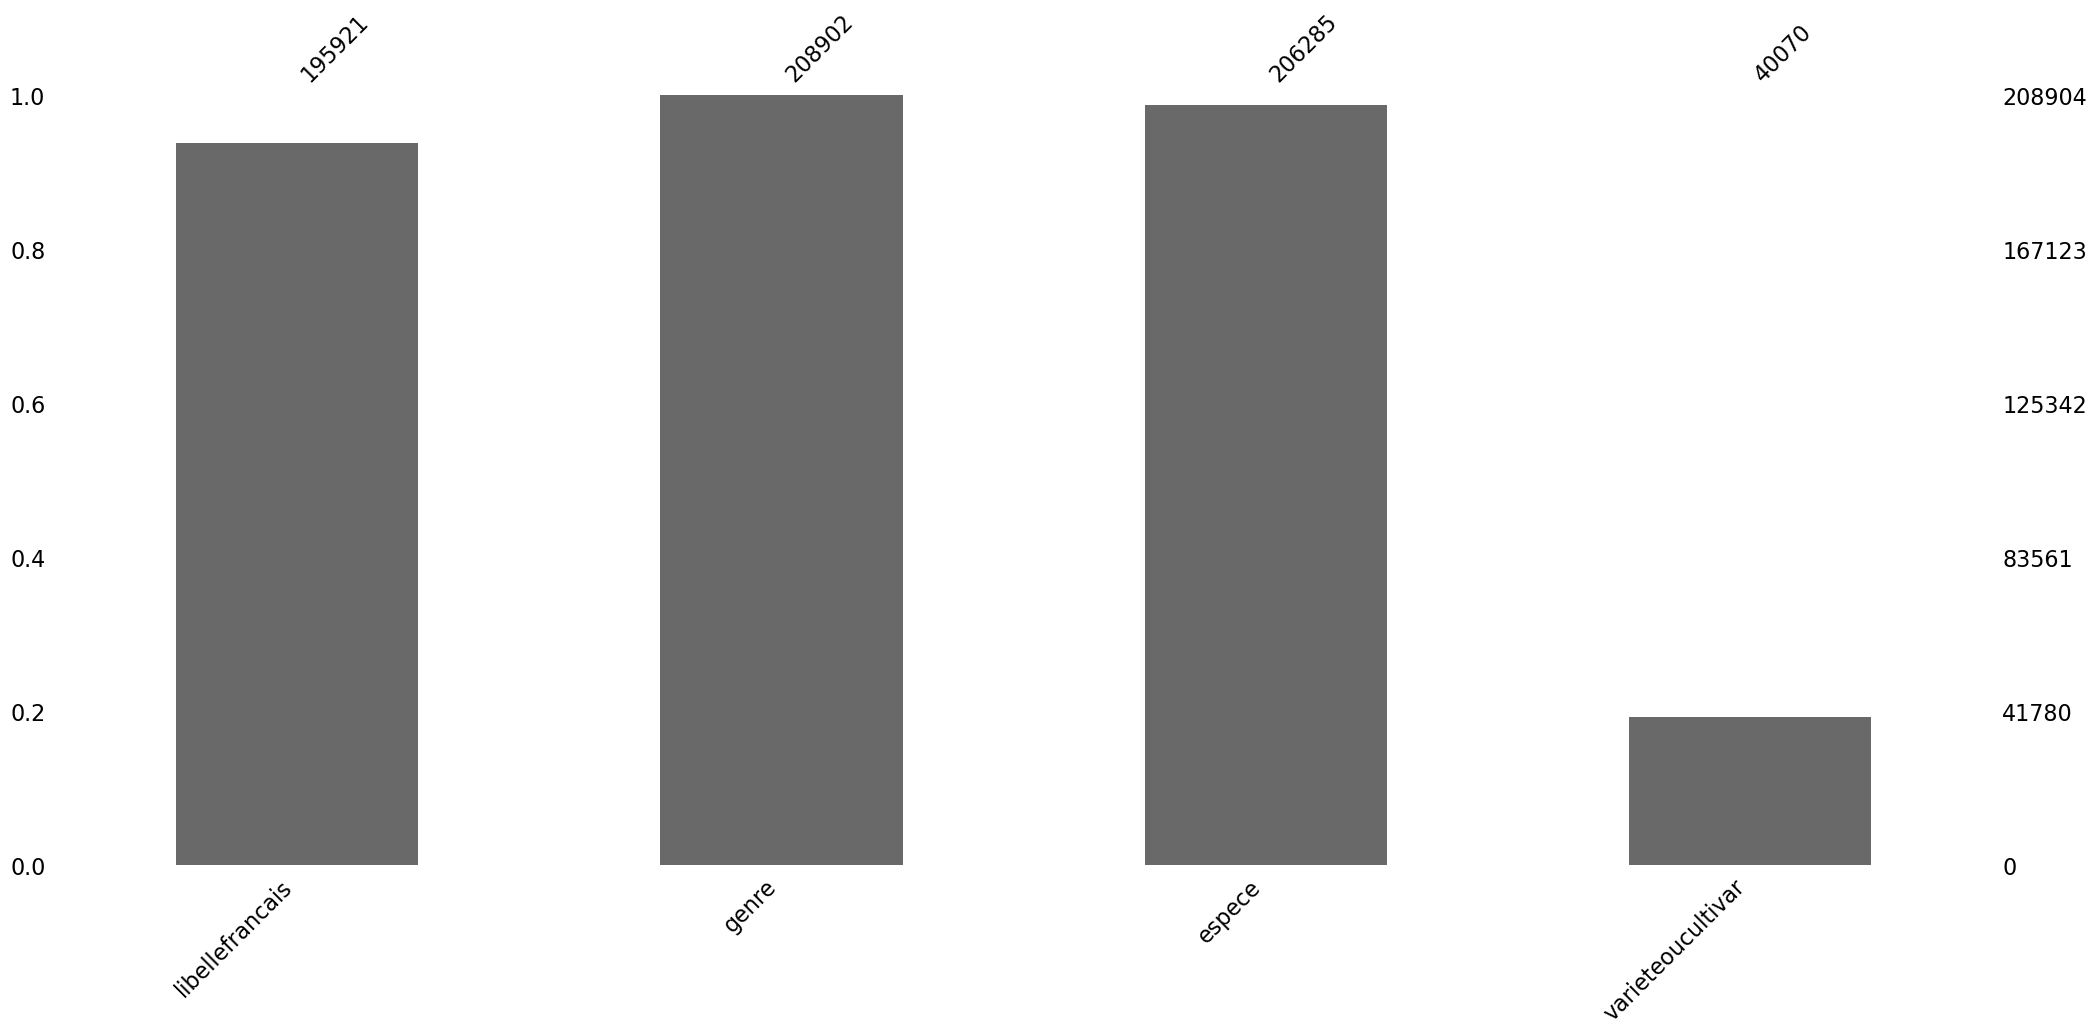

In [215]:
msno.bar(df[['libellefrancais', 'genre', 'espece', 'varieteoucultivar']])

In [216]:
# Je commence par supprimer les lignes pour lesquelles nous n'avons pas d'informations sur l'arbre (type, genre..)
to_drop = df.loc[(df['libellefrancais'].isna()) & (df['genre'].str.contains('Non spécifié')) & (df['espece'].str.contains('n. sp.'))|(df['espece'].isna()),:].index

# Utilisez la méthode drop pour supprimer ces lignes
df = df.drop(to_drop)


In [217]:
df.loc[df['libellefrancais'].isna()][['libellefrancais', 'genre', 'espece']].head()

,libellefrancais,genre,espece
37,None,Acer,n. sp.
47,None,Tilia,x europaea
52,None,Malus,n. sp.
84,None,Malus,n. sp.
87,None,Tilia,n. sp.


In [218]:
correspondances_arbres = {
    'Erable': 'Acer',
    'Tilleul': 'Tilia',
    'Fraxinus': 'Frêne',
    'Cupressus': 'Cyprès',
    'Quercus': 'Chêne',
    'Paulownia': 'Paulownia',
    'Carpinus': 'Charme',
    'Tamaris': 'Tamarix',
    'Troëne': 'Ligustrum',
    'Orme': 'Ulmus',
    'Aubépine': 'Crataegus'   
}
#'Pommier à fruits': 'Malus /domestica',
#'Pommier à fleurs': 'Malus /floribunda',
#'Poirier à fleurs': 'Pyrus/calleryana',
#'Poirier à fruits': 'Pyrus/communis',
#'Cerisier à grappes': 'Prunus/padus',
#'Cerisier à fleurs': 'Prunus/serrulata',
#'Cerisier à fleurs': 'Prunus/maackii',
#'Cerisier à fleurs': 'Prunus/x schmittii',
#'Merisier': 'Prunus/avium',
#'Faux-cyprès': 'Chamaecyparis'




In [219]:
replace_missing = lambda row: correspondances_arbres.get(row['libellefrancais'], row['genre'])

# Appliquez la fonction lambda avec apply pour remplacer les valeurs manquantes
df['libellefrancais'] = df.apply(lambda row: row['libellefrancais'] if pd.notna(row['libellefrancais']) else replace_missing(row), axis=1)

# Remplacez les valeurs manquantes dans 'genre' uniquement si 'libellefrancais' est manquant
df['genre'] = df.apply(lambda row: row['genre'] if pd.notna(row['libellefrancais']) else correspondances_arbres.get(row['libellefrancais'], row['genre']), axis=1)

# Affichez le DataFrame pour vérification
print(df)

        idbase domanialite   arrondissement  \
0       204538  Alignement  PARIS 12E ARRDT   
1       233243  Alignement  PARIS 19E ARRDT   
2       108249      Jardin  PARIS 16E ARRDT   
3       133954      Jardin  PARIS 17E ARRDT   
4       139945      Jardin  PARIS 19E ARRDT   
...        ...         ...              ...   
208899  184910       DASCO  PARIS 18E ARRDT   
208900  249117  Alignement  PARIS 20E ARRDT   
208901  265767  Alignement  PARIS 15E ARRDT   
208902  277158  Alignement   PARIS 7E ARRDT   
208903  292637  Alignement  PARIS 18E ARRDT   

                                              adresse idemplacement  \
0                                   AVENUE DU BEL AIR     000103027   
1                                   RUE DE BELLEVILLE     002901003   
2          JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010   
3            SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001   
4                                  JARDIN ILOT RIQUET      00000101   
...      

<Axes: >

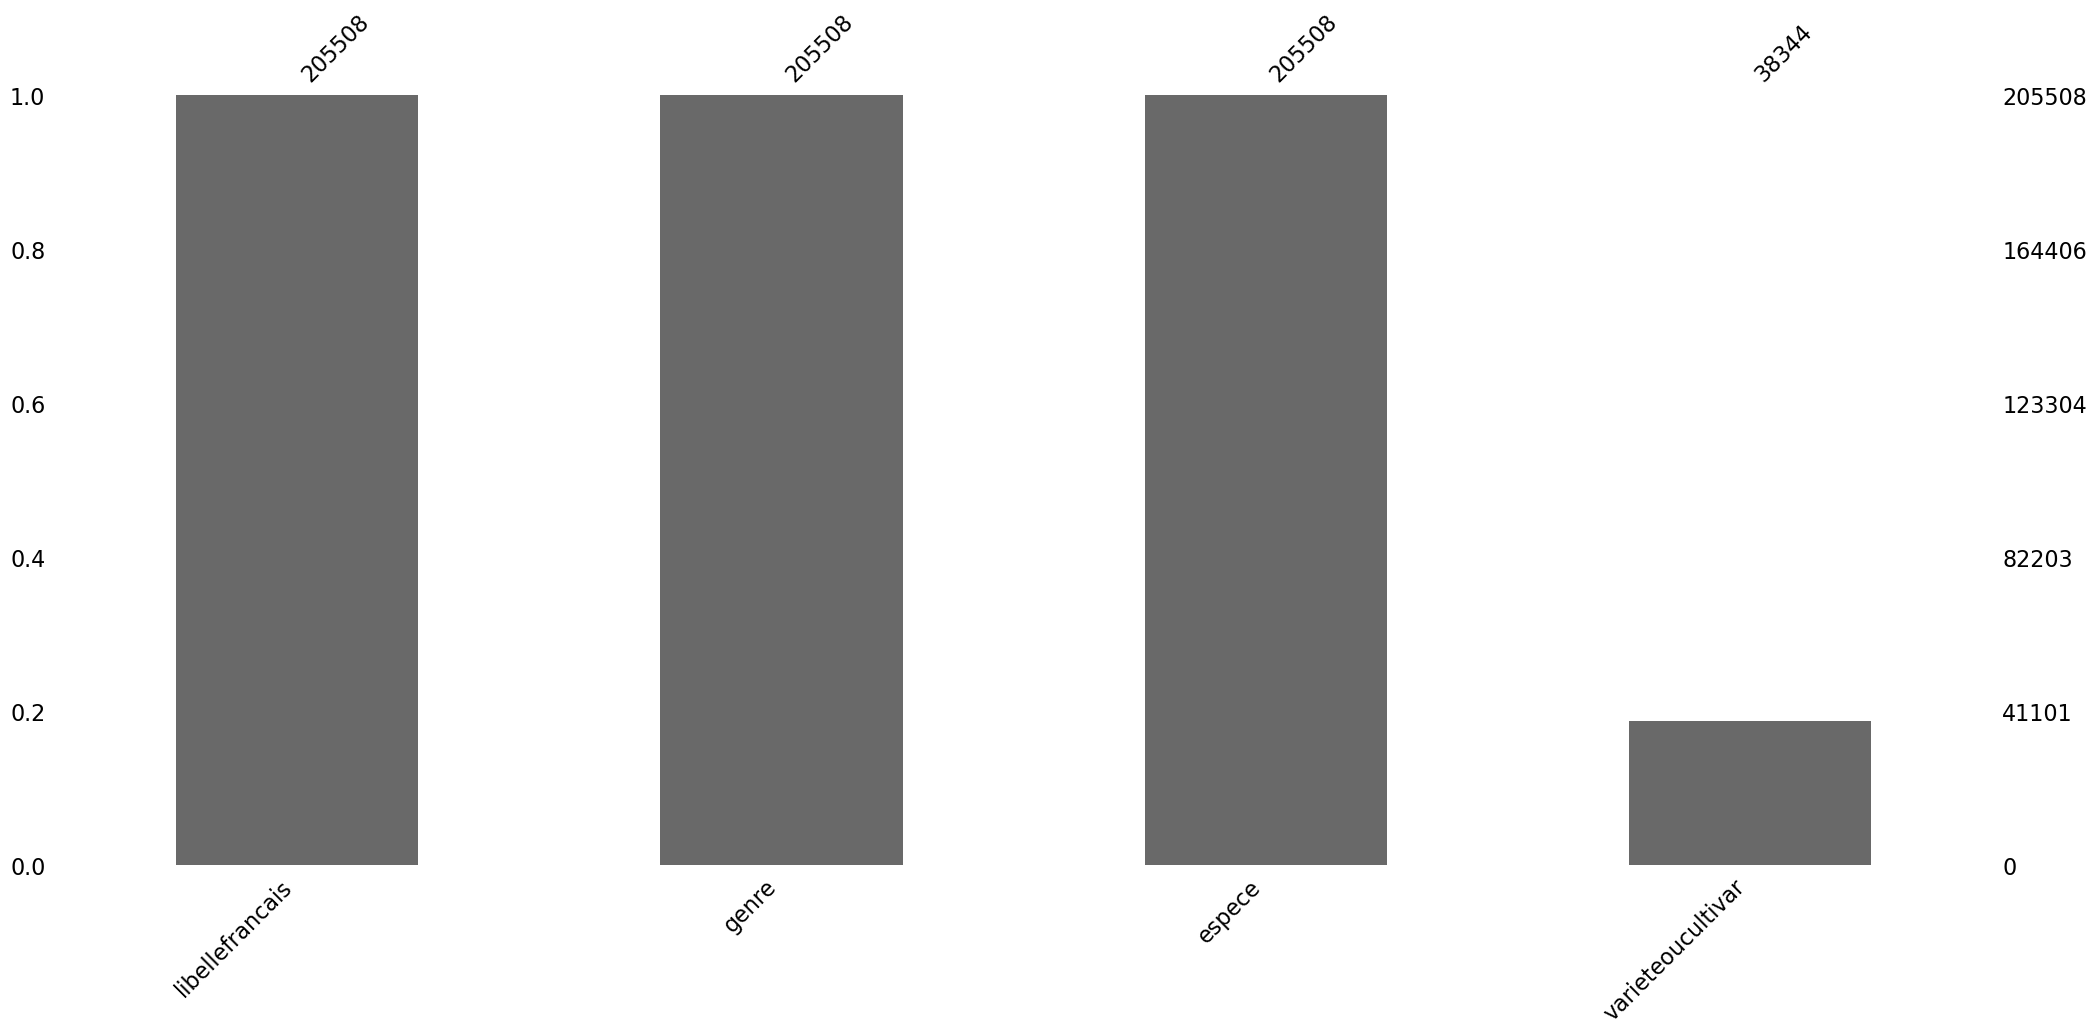

In [220]:
msno.bar(df[['libellefrancais', 'genre', 'espece', 'varieteoucultivar']])

La colonne varieteoucultivar contient beaucoup de valeurs manquantes et ne sera pas utile pour la suite de l'analyse car nous avons assez d'informations sur les types d'arbres avec les colonnes 'libellefrancais', 'genre' et 'espece'.

In [221]:
df = df.drop('varieteoucultivar',axis=1)

## Colonne stadedeveloppement

In [222]:
df['stadedeveloppement'].isna().sum()

45739

In [223]:
df['stadedeveloppement'].describe()

count     159769
unique         4
top       Adulte
freq       77829
Name: stadedeveloppement, dtype: object

In [224]:
df['stadedeveloppement'].value_counts()

stadedeveloppement
Adulte                 77829
Jeune (arbre)Adulte    38054
Jeune (arbre)          36504
Mature                  7382
Name: count, dtype: int64

In [225]:
df.groupby('stadedeveloppement')['circonferenceencm'].mean()

stadedeveloppement
Adulte                 121.993023
Jeune (arbre)           36.010437
Jeune (arbre)Adulte     67.519393
Mature                 228.263072
Name: circonferenceencm, dtype: float64

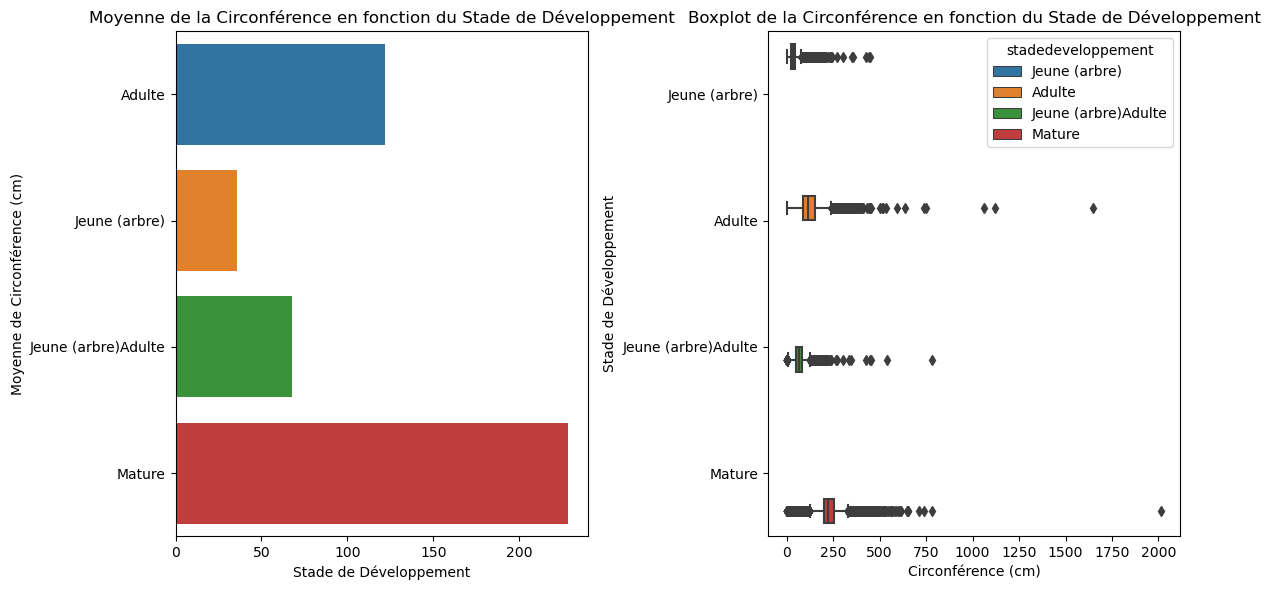

In [226]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique 1 : Barplot
sns.barplot(y='stadedeveloppement', x='circonferenceencm', data=df.groupby('stadedeveloppement')['circonferenceencm'].mean().reset_index(), ax=axes[0])

# Ajoutez des étiquettes au graphique
axes[0].set_title('Moyenne de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Stade de Développement')
axes[0].set_ylabel('Moyenne de Circonférence (cm)')

# Graphique 2 : Boxplot
sns.boxplot(data=df, y='stadedeveloppement', x='circonferenceencm', hue='stadedeveloppement', ax=axes[1])

# Ajoutez des étiquettes au graphique
axes[1].set_title('Boxplot de la Circonférence en fonction du Stade de Développement')
axes[1].set_xlabel('Circonférence (cm)')
axes[1].set_ylabel('Stade de Développement')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez le subplot
plt.show()

In [227]:
df.loc[df['stadedeveloppement'].isna()][['stadedeveloppement','circonferenceencm','libellefrancais']]

,stadedeveloppement,circonferenceencm,libellefrancais
7,None,60,Robinier
15,None,0,Hêtre
16,None,0,Erable
32,None,0,Hêtre
36,None,20,Platane
...,...,...,...
208883,None,84,Tilleul
208890,None,10,Poirier à fruits
208895,None,70,Tilleul
208897,None,0,Tulipier


In [228]:
df_stade_dev =df.groupby(['libellefrancais','stadedeveloppement'])['circonferenceencm'].agg(['min','max','count','median']).reset_index()

In [229]:
df_stade_dev

,libellefrancais,stadedeveloppement,min,max,count,median
0,Abelia,Adulte,75,75,1,75.0
1,Abies,Adulte,25,220,7,110.0
2,Abies,Jeune (arbre),10,90,4,35.0
3,Abies,Jeune (arbre)Adulte,50,125,3,60.0
4,Abricotier,Jeune (arbre),5,45,52,20.0
...,...,...,...,...,...,...
704,Zelkova,Adulte,75,90,5,85.0
705,Zelkova,Jeune (arbre),29,90,8,50.0
706,Zelkova,Jeune (arbre)Adulte,16,71,14,40.0
707,x Cupressocyparis,Adulte,112,130,2,121.0


In [238]:
df.loc[(df['circonferenceencm'] == 0) & (df['hauteurenm'] == 0) & (~df['stadedeveloppement'].isna()),'stadedeveloppement'] = 'Jeune (arbre)'

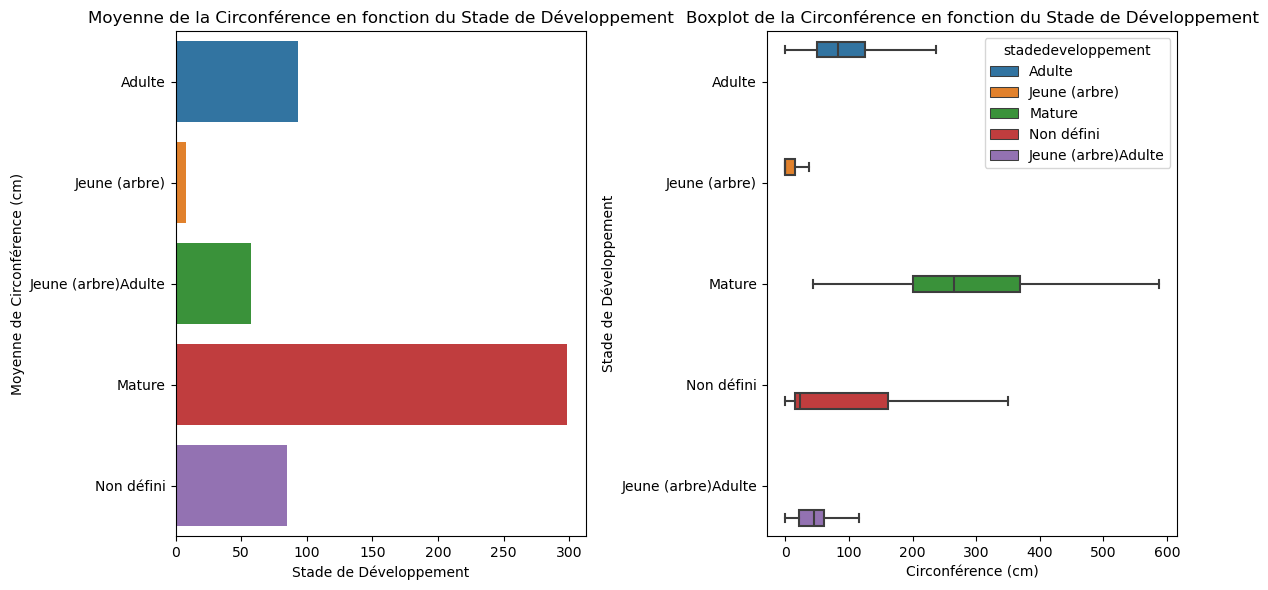

In [239]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique 1 : Barplot
sns.barplot(y='stadedeveloppement', x='circonferenceencm', data=df.groupby('stadedeveloppement')['circonferenceencm'].mean().reset_index(), ax=axes[0])

# Ajoutez des étiquettes au graphique
axes[0].set_title('Moyenne de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Stade de Développement')
axes[0].set_ylabel('Moyenne de Circonférence (cm)')

# Graphique 2 : Boxplot
sns.boxplot(data=df, y='stadedeveloppement', x='circonferenceencm', hue='stadedeveloppement', ax=axes[1],showfliers=False)

# Ajoutez des étiquettes au graphique
axes[1].set_title('Boxplot de la Circonférence en fonction du Stade de Développement')
axes[1].set_xlabel('Circonférence (cm)')
axes[1].set_ylabel('Stade de Développement')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez le subplot
plt.show()

In [240]:
dict_paliers = {}

for _, row in df_stade_dev.iterrows():
    key = (row['libellefrancais'],)
    
    if key not in dict_paliers:
        dict_paliers[key] = []
    
    dict_paliers[key].append((row['min'], row['max'], row['stadedeveloppement']))

# Définir la fonction pour attribuer le stade de développement en fonction de la circonférence
def attribuer_stade_par_plage(row, dict_paliers):
    key = (row['libellefrancais'],)
    
    if key in dict_paliers:
        for min_val, max_val, stade in dict_paliers[key]:
            if min_val <= row['circonferenceencm'] <= max_val:
                return stade
    
    return 'Non défini'

# Appliquer la fonction à chaque ligne du DataFrame principal
df['stadedeveloppement'] = df.apply(lambda row: attribuer_stade_par_plage(row, dict_paliers), axis=1)

# Afficher le DataFrame mis à jour
print(df)

        idbase domanialite   arrondissement  \
0       204538  Alignement  PARIS 12E ARRDT   
1       233243  Alignement  PARIS 19E ARRDT   
2       108249      Jardin  PARIS 16E ARRDT   
3       133954      Jardin  PARIS 17E ARRDT   
4       139945      Jardin  PARIS 19E ARRDT   
...        ...         ...              ...   
208899  184910       DASCO  PARIS 18E ARRDT   
208900  249117  Alignement  PARIS 20E ARRDT   
208901  265767  Alignement  PARIS 15E ARRDT   
208902  277158  Alignement   PARIS 7E ARRDT   
208903  292637  Alignement  PARIS 18E ARRDT   

                                              adresse idemplacement  \
0                                   AVENUE DU BEL AIR     000103027   
1                                   RUE DE BELLEVILLE     002901003   
2          JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010   
3            SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001   
4                                  JARDIN ILOT RIQUET      00000101   
...      

In [241]:
df.loc[df['stadedeveloppement'].isna()][['stadedeveloppement','circonferenceencm','libellefrancais']]

,stadedeveloppement,circonferenceencm,libellefrancais


<Axes: >

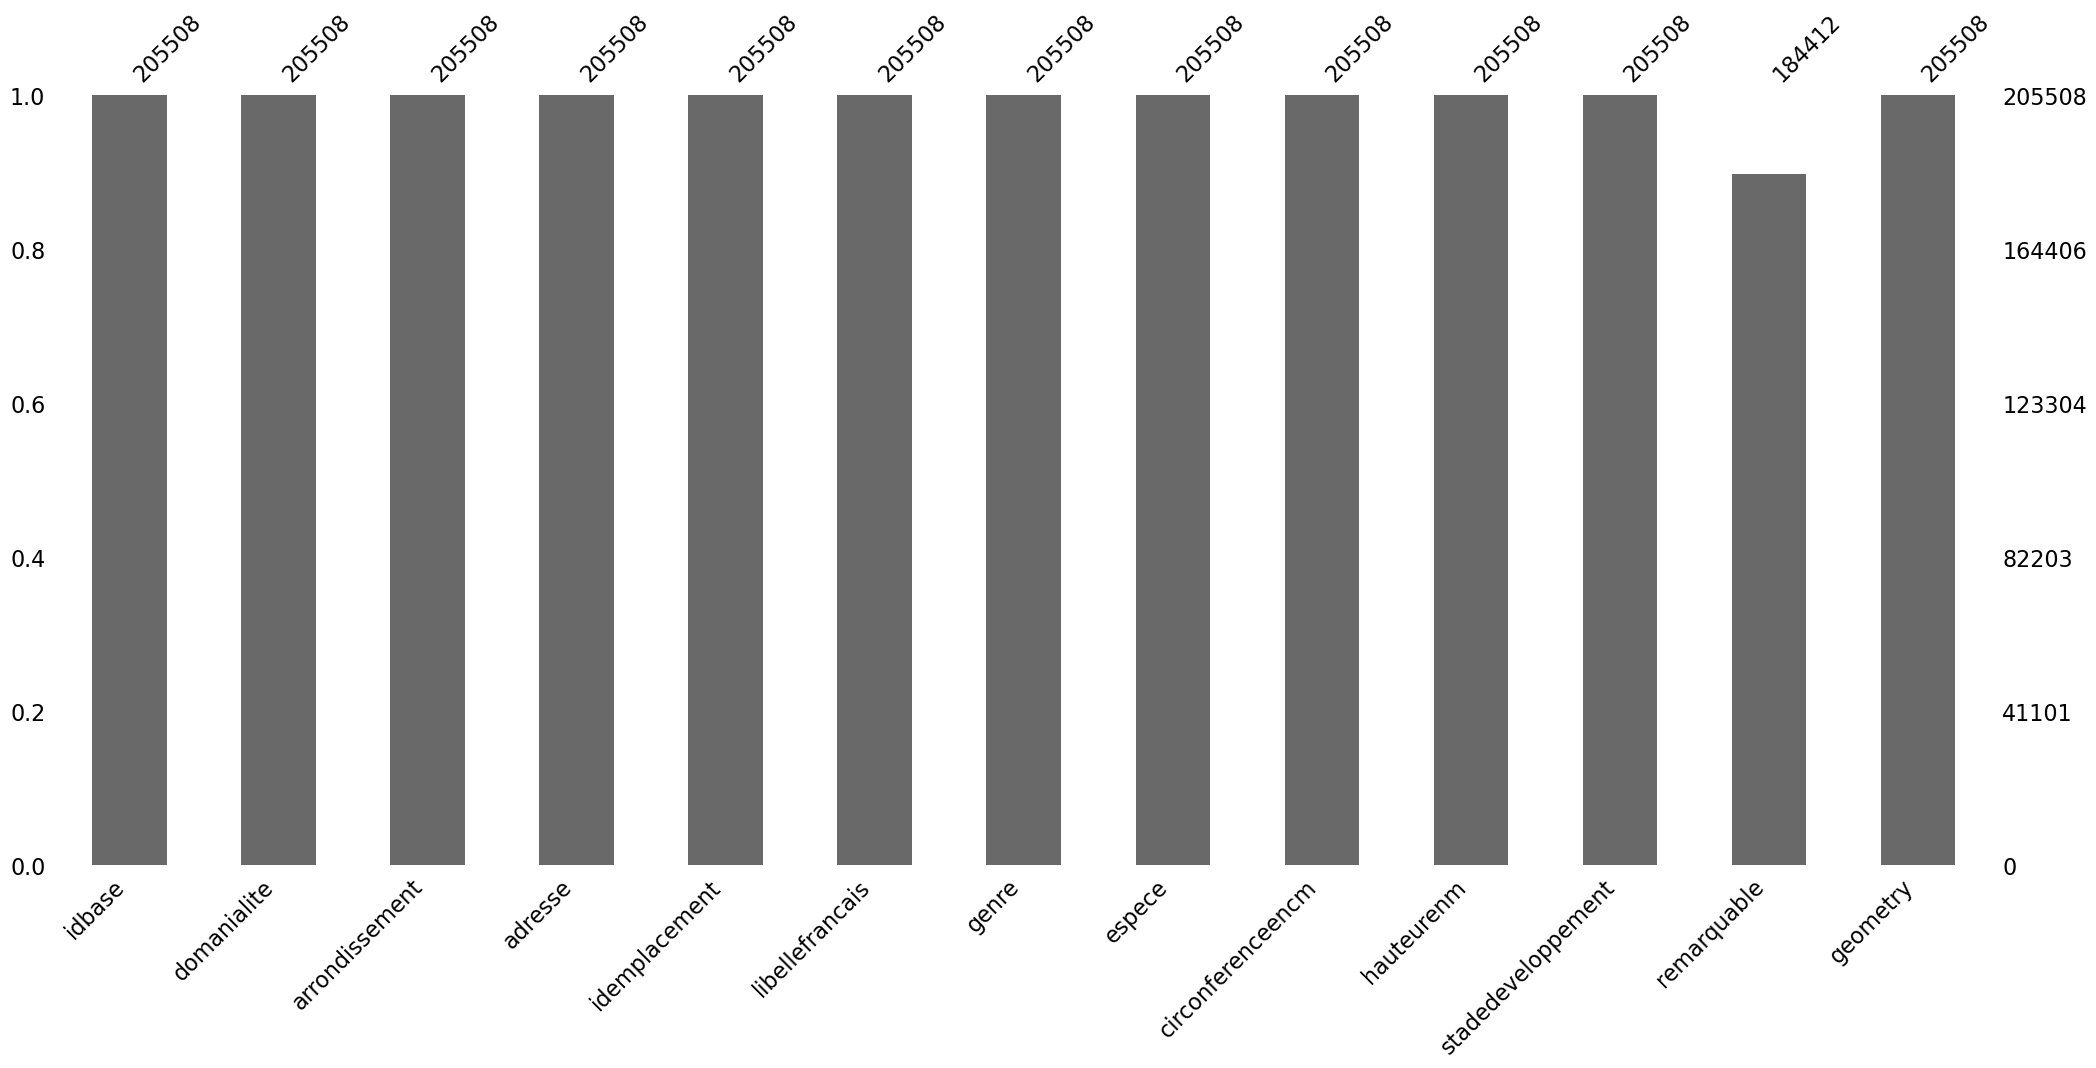

In [242]:
msno.bar(df)

## Colonne remarquable

In [243]:
df.loc[(~df['remarquable'].isna()) &(df['remarquable']!='NON')]['idbase'].count()

187

In [244]:
df['remarquable'].describe()

count     184412
unique         2
top          NON
freq      184225
Name: remarquable, dtype: object

In [245]:
df.loc[(df['remarquable']!='NON'),:]

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
15,129708,Jardin,PARIS 15E ARRDT,PARC ANDRE CITROEN,00050448,Hêtre,Fagus,sylvatica,0,0,Adulte,None,POINT (2.27529 48.84146)
16,142349,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / AVENUE DES ERABLES NOIRS...,A05100073006,Erable,Acer,platanoides,0,0,Adulte,None,POINT (2.41578 48.90928)
32,129742,Jardin,PARIS 15E ARRDT,PARC ANDRE CITROEN,00050482,Hêtre,Fagus,sylvatica,0,0,Adulte,None,POINT (2.27529 48.84136)
38,130689,Jardin,PARIS 15E ARRDT,PARC ANDRE CITROEN,00090085,Charme,Carpinus,betulus,0,0,Jeune (arbre)Adulte,None,POINT (2.27207 48.84077)
52,160253,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / DIV 61,D00000061006,Malus,Malus,n. sp.,25,4,Adulte,None,POINT (2.41423 48.90903)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208862,161127,CIMETIERE,VAL-DE-MARNE,CIMETIERE DE THIAIS / AVENUE CENTRALE / DIV 62,A01300062008,Platane,Platanus,orientalis,0,0,Adulte,None,POINT (2.37648 48.76095)
208872,152410,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / AVENUE DES CHENES ROUGES...,A048F2040006,Charme,Carpinus,betulus,115,10,Adulte,None,POINT (2.41037 48.90973)
208895,170665,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / AVENUE DE BOBIGNY / DIV F59,A01900F59015,Tilleul,Tilia,x europaea,70,8,Adulte,None,POINT (2.41528 48.91010)
208897,160004,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / AVENUE DES NOYERS D''AME...,A07200440008,Tulipier,Liriodendron,tulipifera,0,0,Non défini,None,POINT (2.40499 48.90348)


In [186]:
df.loc[(df['genre']=='Fraxinus')|(df['genre']=='Betula'),'stadedeveloppement']='Adulte'

In [190]:
df.loc[(df['genre']=='Cedrus')|(df['stadedeveloppement']=='Jeune (arbre)'),'stadedeveloppement']='Adulte'

In [191]:
df_remarquable = df.loc[(~df['remarquable'].isna()) &(df['remarquable']!='NON'),:]

In [192]:
df_remarquable

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
339,307582,Jardin,PARIS 8E ARRDT,JARDINS DES CHAMPS ELYSEES - ABORDS OUEST DU G...,000109002,Platane,Platanus,x hispanica,495,28,Adulte,OUI,POINT (2.31333 48.86515)
897,2002349,Jardin,BOIS DE BOULOGNE,RESERVOIR DE LA GRANDE CASCADE - CARREFOUR DE ...,000901001,Pin,Pinus,nigra subsp. laricio,241,30,Adulte,OUI,POINT (2.24177 48.86301)
1374,2002378,Jardin,BOIS DE VINCENNES,PELOUSE DE FONTENAY - AVENUE DE LA BELLE GABRI...,12-23,Erable,Acer,cappadocicum,320,18,Adulte,OUI,POINT (2.46413 48.84094)
2239,158609,CIMETIERE,PARIS 20E ARRDT,CIMETIERE DU PERE LACHAISE / DIV 77,D00000077024,Chicot du Canada,Gymnocladus,dioica,155,11,Adulte,OUI,POINT (2.39907 48.86152)
4592,2002348,Jardin,BOIS DE BOULOGNE,GRANDE CASCADE - CARREFOUR DE LONGCHAMP,000301002,Cèdre,Cedrus,atlantica,468,25,Adulte,OUI,POINT (2.24048 48.86339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202199,201570,DJS,PARIS 16E ARRDT,STADE DE LA PORTE DE LA MUETTE / 60 BOULEVARD ...,470306001,Hêtre,Fagus,sylvatica,322,15,Adulte,OUI,POINT (2.26796 48.86420)
202584,106913,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS ET PELOUSES DE L ECOLE...,P00709013,Cedrus,Cedrus,atlantica,321,20,Adulte,OUI,POINT (2.29863 48.85438)
205264,152606,CIMETIERE,PARIS 20E ARRDT,CIMETIERE DU PERE LACHAISE / DIV 4,D00000004036,Cèdre,Cedrus,atlantica,390,25,Adulte,OUI,POINT (2.39184 48.86081)
207795,2017817,Alignement,PARIS 10E ARRDT,PLACE DE LA REPUBLIQUE,000401009,Chêne,Quercus,cerris,53,7,Adulte,OUI,POINT (2.36319 48.86830)


In [246]:
df_remarquable.groupby(['genre','stadedeveloppement'])[['circonferenceencm','hauteurenm']].agg(['count','min','max','median'])

circonferenceencm                   \
                                              count  min  max median   
genre          stadedeveloppement                                      
Acer           Adulte                             5  209  320  265.0   
               Mature                             1  437  437  437.0   
Aesculus       Adulte                             9   95  390  350.0   
Alnus          Adulte                             1  253  253  253.0   
Araucaria      Adulte                             1  182  182  182.0   
Betula         Adulte                             1  226  226  226.0   
Calocedrus     Adulte                             2  205  209  207.0   
Catalpa        Adulte                             1  200  200  200.0   
               Mature                             1  397  397  397.0   
Cedrus         Adulte                             8   20  468  338.0   
Celtis         Adulte                             2  177  290  233.5   
Corylus        Adulte                             4  160  230  217.5   
               Mature                             2  259  265  262.0   
Cryptomeria    Mature                             1  130  130  130.0   
Davidia        Adulte                             1  120  120  120.0   
Diospyros      Adulte                             6  115  175  150.5   
Eucommia       Adulte                             2  130  195  162.5   
Fagus          Adulte                            10  110  322  202.5   
               Mature                             2  415  420  417.5   
Ficus          Adulte                             2  120  145  132.5   
Firmiana       Adulte                             1  132  132  132.0   
Fraxinus       Adulte                             1  405  405  405.0   
Ginkgo         Adulte                             5  165  280  210.0   
               Mature                             3  355  434  430.0   
Gymnocladus    Adulte                             2  155  177  166.0   
Juglans        Adulte                             1  595  595  595.0   
Koelreuteria   Adulte                             1  174  174  174.0   
Liriodendron   Adulte                             3  211  253  225.0   
               Mature                             1  310  310  310.0   
Maclura        Adulte                             1  215  215  215.0   
Magnolia       Adulte                             6  110  205  176.5   
Melia          Adulte                             1  147  147  147.0   
Metasequoia    Adulte                             1  251  251  251.0   
Morus          Adulte                             1  105  105  105.0   
Pinus          Adulte                             3   90  330  241.0   
Pistacia       Adulte                             1  176  176  176.0   
Platanus       Adulte                            45    0  740  465.0   
Prunus         Mature                             1  240  240  240.0   
Pterocarya     Adulte                             2  340  371  355.5   
               Mature                             5  407  587  435.0   
Punica         Adulte                             1   30   30   30.0   
Quercus        Adulte                             9   53  267  207.0   
               Mature                             2  430  465  447.5   
Robinia        Mature                             1  365  365  365.0   
Salix          Adulte                             2  140  285  212.5   
Sequoia        Adulte                             2  191  402  296.5   
Sequoiadendron Adulte                             5  335  634  511.0   
Styphnolobium  Adulte                             1  313  313  313.0   
               Mature                             1  408  408  408.0   
Tamarix        Mature                             1  230  230  230.0   
Taxodium       Adulte                             2  300  311  305.5   
               Mature                             1  354  354  354.0   
Taxus          Adulte                             4  110  303  193.0   
Ti

In [247]:
df.loc[(df['remarquable'].isna())&(df['stadedeveloppement']=='Jeune (arbre)'),'remarquable']='NON'

In [248]:
df.loc[df['remarquable'].isna()][['genre','circonferenceencm','hauteurenm','stadedeveloppement','remarquable']]

,genre,circonferenceencm,hauteurenm,stadedeveloppement,remarquable
15,Fagus,0,0,Adulte,None
16,Acer,0,0,Adulte,None
32,Fagus,0,0,Adulte,None
38,Carpinus,0,0,Jeune (arbre)Adulte,None
52,Malus,25,4,Adulte,None
...,...,...,...,...,...
208862,Platanus,0,0,Adulte,None
208872,Carpinus,115,10,Adulte,None
208895,Tilia,70,8,Adulte,None
208897,Liriodendron,0,0,Non défini,None


In [249]:
df.loc[(df['remarquable'].isna())&(df['circonferenceencm']==0)&(df['hauteurenm']==0),'remarquable']='NON'

In [251]:
df.loc[df['remarquable'].isna(),'remarquable']='Non indiqué'

<Axes: >

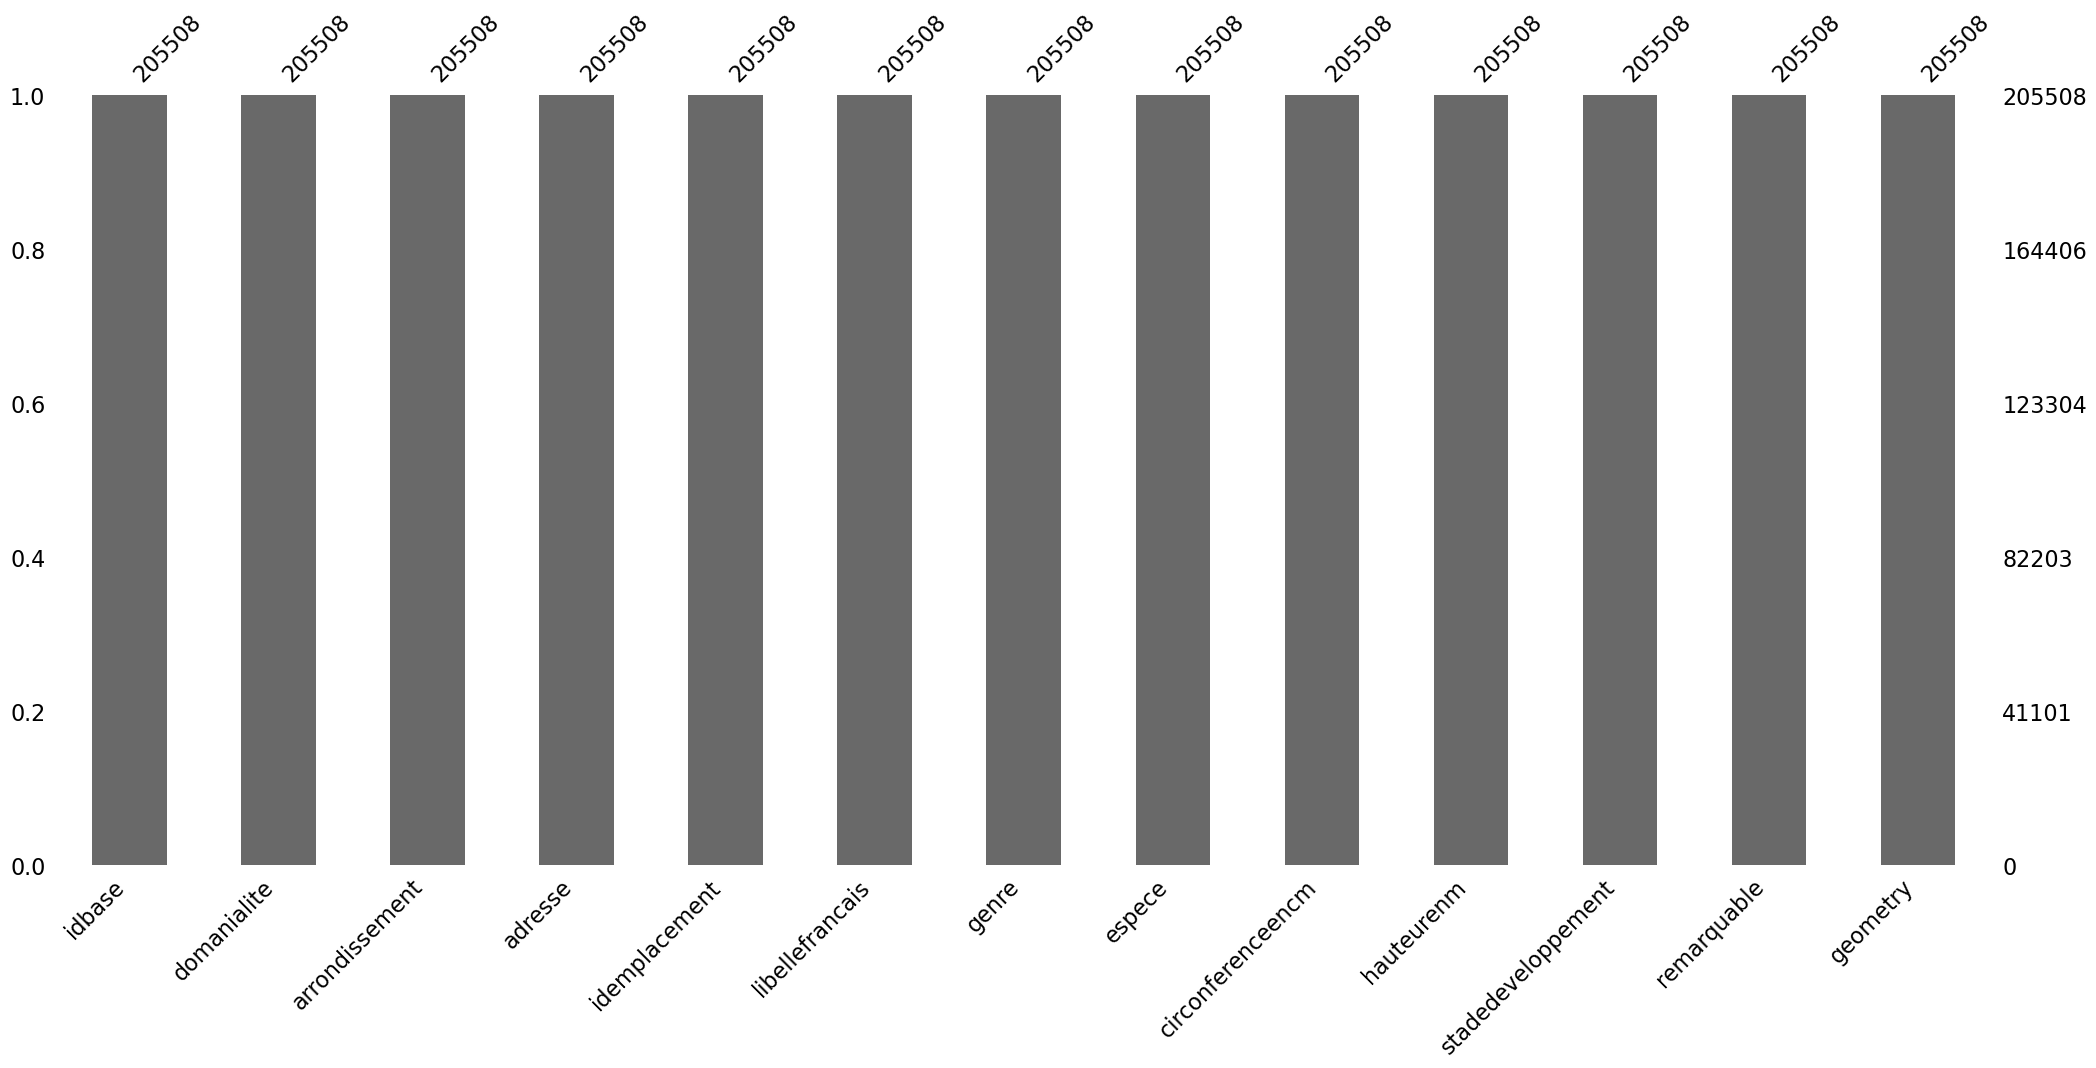

In [253]:
msno.bar(df)

## Préparation de géopandas pour la visualisation des données

In [28]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'circonferenceencm', 'hauteurenm',
       'stadedeveloppement', 'remarquable', 'geometry'],
      dtype='object')

In [29]:
# Je crée une colonne de géométrie contenant des objets Point en utilisant la longitude et la latitude du jeu de données.
geometry= df['geometry'];
geometry[:3]

0    POINT (2.39702 48.84681)
1    POINT (2.40119 48.87590)
2    POINT (2.28903 48.86010)
Name: geometry, dtype: geometry

In [30]:
df_geo = gpd.GeoDataFrame(df,crs='epsg:4326',geometry=geometry)

Text(0.5, 1.0, 'arrondissement')

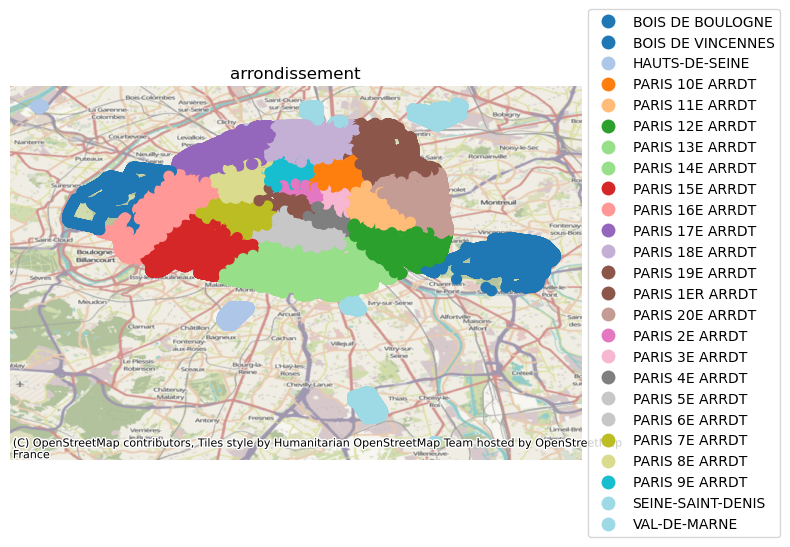

In [31]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
df_geo.plot(ax=ax, column = df_geo['arrondissement'], cmap = 'tab20', marker = 'o', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("arrondissement")

<img src=paris.png width="500" height="200"> <img src=paris_2.jpg width="500" height="200">



In [32]:
df_geo_test = df_geo.loc[~df_geo['arrondissement'].str.contains('ARRDT')]

Text(0.5, 1.0, 'périphérie')

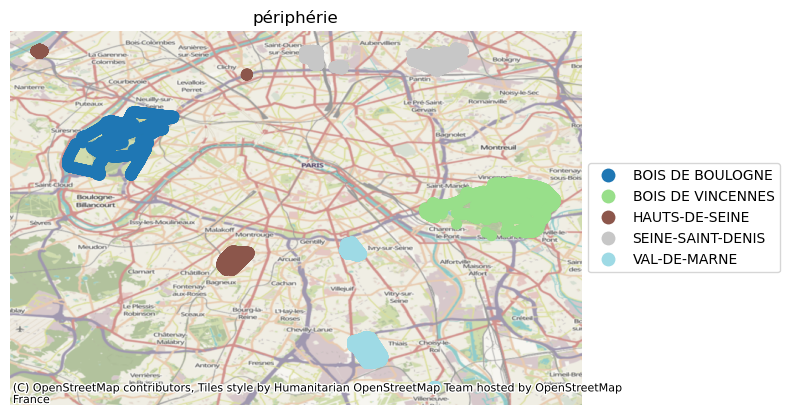

In [33]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
df_geo_test.plot(ax=ax, column = df_geo_test['arrondissement'], cmap = 'tab20', marker = 'o', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("périphérie")

In [34]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'circonferenceencm', 'hauteurenm',
       'stadedeveloppement', 'remarquable', 'geometry'],
      dtype='object')